In [ ]:
## import python data analysis library
import pandas as pd

## import data visualization library matplotlib and seaborn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator, FuncFormatter
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from matplotlib import rc
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset,
                                                  zoomed_inset_axes)
import matplotlib.cm as cm
import numpy as np
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression

## import module to read files
import mimetypes
import urllib
import os

# import google colab to use google colab as editor
# if you use other editor, do not need to import google.colab here
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  # This is added back by InteractiveShellApp.init_path()


Mounted at /content/drive


In [ ]:

## setting path
# get current path
path_current = os.getcwd()
# the path is where the dataset saved
path = path_current + '/drive/My Drive/Visualization/Data/' 
# the "path_img" is the position where final image will be saved
path_img = path_current + '/drive/My Drive/Visualization/Images/'

In [ ]:
class Scatter:
    # read data
    def read_file(self, file):
        """Read different types of files and return pandas dataframe.

        This function can transform multiple file type such as csv/excel/text into
        a pandas dataframe. User need to input the filename such as: 'file.csv'.
        If the file type cannot be find or not support it, it will return the message.

        Args:
            file: filename of user data source

        Returns:
            data : A pandas dataframe

        """
        # Get the file URL
        file_url = urllib.request.pathname2url(file)  # try catch
        # use mimetypes package to guess the file type
        # For example: 'file.csv' will return 'csv'
        ftype = mimetypes.guess_type(file_url, strict=True)[0]
        ## read data file according to its formate, default includes three types of files: csv/excel/text
        # read csv format data
        if 'csv' in ftype:
            # usecols: return a subset of the columns, here choose one column to use in the line chart
            data = pd.read_csv(path + file)
        # read excel format data
        elif 'sheet' in ftype:
            data = pd.read_excel(path + file)
        # read text format data
        elif ftype == 'text/plain':
            data = pd.read_csv(path + file, sep="\t")
        else:
            print("File type cannot find!")
        return data

    def linear_trend(self, data, x_col_name, y_col_name):
        """Add the trend line for the scatter plot

        The trend line is caculated it by sklearn.linear_model. When the user input trend_line=True in scatter_plot
        method, it draw the trend line based on that scatter plot.

        Args:
            data: The pandas dataframe
            x_col_name : The X column name
            y_col_name : The Y column name

        """

        # reshape the X and Y value to fit linear regressor
        X = data[x_col_name].values.reshape(-1, 1)
        Y = data[y_col_name].values.reshape(-1, 1)

        # using linear_regressor to calcaulate the Trend line
        linear_regressor = LinearRegression()
        linear_regressor.fit(X, Y)
        Y_pred = linear_regressor.predict(X)
        plt.plot(X, Y_pred, color='#20639B')

    def scatter_plot(self,
                     file,
                     x_col_name,
                     y_col_name,
                     x_label,
                     y_label,
                     output_name=None,
                     **kwargs):
        """Basic scatter plot with trend line or not

        This function will convert the user's incoming data set into DataFrame and then draw
        the scatter Chart using Matplotlib. This scatter chart can show x, y and trend line.
        The basic scatter plot is used to plot the relationship bewteen two variables. The user can
        select trend_line=True to use the trend line.

        Args:
            file: file name of your data source
            x_col_name: The X column name
            y_col_name: The Y column name
            x_label: x axis label
            y_label: y axis label
            output_name : the output file name. The deafult output name is dataset name. The output file type is PDF. For example, The output file name would be :'dataset1.pdf'

        """
        conf = {
            'plotwidth':
            6,  # weight
            'plotheight':
            4.5,  # height
            'my_font':
            'DejaVu Sans',
            'backgrid':
            True,
            'isframe':
            True,
            'trend_line':
            False,
            'linewidth':
            2,
            'gridlinewidth':
            0.5,
            'gridline_style':
            '--',
            'gridline_color':
            'gray',
            'gridline_alpha':
            0.5,
            'labeltext_size':
            20,
            'labelpad':
            10,
            'legend_size':
            10,
            'scatter_size':
            100,
            'legend_loc':
            'upper right',
            'title':
            False,
            'title_pad':
            10,
            'title_size':
            15,
            'title_loc':
            'center',
            'xtrick_fontsize':
            15,
            'ytrick_fontsize':
            15,
            'bubble_marker':
            'o',
            'alpha':
            0.8,
            'colors_list': [
                "#3d405b", "#e07a5f", "#f4f1de", "#81b29a", "#f2cc8f",
                "#264653", "#2a9d8f", "#e9c46a", "#f4a261", "#e76f51",
                '#ECE133', '#56B4E9'
            ],
            'plot_title':''
        }

        # when new configuraton is set, update the original one
        conf.update(kwargs)
        ## create figure and set figure size
        fig, ax = plt.subplots(figsize=(conf['plotwidth'], conf['plotheight']))
        ## background grid setting
        if conf['backgrid'] == True:
            ax.grid(linestyle=conf['gridline_style'],
                    linewidth=conf['gridlinewidth'],
                    color=conf['gridline_color'],
                    alpha=conf['gridline_alpha'])

        ## x, y axis setting
        # fontsize: x, y title size
        ax.set_xlabel(x_label,
                      fontproperties=conf['my_font'],
                      fontsize=conf['labeltext_size'],
                      labelpad=conf['labelpad'])
        ax.set_ylabel(y_label,
                      fontproperties=conf['my_font'],
                      fontsize=conf['labeltext_size'],
                      labelpad=conf['labelpad'])

        # Input the valid filename and return the pandas dataframe for drawing
        data = self.read_file(file)

        # scatter plot
        ax.scatter(data[x_col_name],
                   data[y_col_name],
                   s=conf['scatter_size'],
                   c=conf['colors_list'][0])

        # add the trend line
        # The default is not with trend line, The user need to type trend_line=True in the parameter
        if conf['trend_line'] == True:
            self.linear_trend(data, x_col_name, y_col_name)

        # xtricks and yticks font size
        plt.xticks(fontsize=conf['xtrick_fontsize'])
        plt.yticks(fontsize=conf['ytrick_fontsize'])

        # title
        plt.title(conf['plot_title'], fontsize=conf['title_size'])

        # if the output name is empty, the output name will be file name
        if output_name == None:
            output_name = file.split(".")[0]

        # save the plot
        plt.savefig(path_img + output_name)

        # show the plot
        plt.show()

    def scatter_category(self,
                         file,
                         x_col_name,
                         y_col_name,
                         x_label,
                         y_label,
                         category_col,
                         output_name=None,
                         **kwargs):
        """scatter plot with differnt category

        This function will convert the user's incoming data set into DataFrame and then draw
        the scatter Chart using Matplotlib. This scatter chart can show x, y and different color for different category scatter.

        The user have to input three vaiables column inculding x_col_name, y_col_name and category_col. The category_col
        will make each scatter being different color and also have the legend labels.


        Agrs:
            file: file name of your data source
            x_col_name: The X column name
            y_col_name: The Y column name
            category_col : The category of each scatter
            x_label: x axis label
            y_label: y axis label
            output_name : the output file name. The deafult output name is dataset name. The output file type is PDF. For example, The output file name would be :'dataset1.pdf'


        """

        conf = {
            'plotwidth':
            6,  # weight
            'plotheight':
            4.5,  # height
            'my_font':
            'DejaVu Sans',
            'backgrid':
            True,
            'isframe':
            True,
            'trend_line':
            False,
            'linewidth':
            2,
            'gridlinewidth':
            0.5,
            'gridline_style':
            '--',
            'gridline_color':
            'gray',
            'gridline_alpha':
            0.5,
            'labeltext_size':
            20,
            'labelpad':
            10,
            'legend_size':
            10,
            'scatter_size':
            100,
            'legend_loc':
            'upper right',
            'title':
            False,
            'title_pad':
            10,
            'title_size':
            15,
            'title_loc':
            'center',
            'xtrick_fontsize':
            15,
            'ytrick_fontsize':
            15,
            'bubble_marker':
            'o',
            'alpha':
            0.8,
            'colors_list': [
                "#3d405b", "#e07a5f", "#f4f1de", "#81b29a", "#f2cc8f",
                "#264653", "#2a9d8f", "#e9c46a", "#f4a261", "#e76f51",
                '#ECE133', '#56B4E9'
            ],
            'plot_title':'',
            'ylim_setting':True,
            'ylim_buttom':0
        }

        # when new configuraton is set, update the original one
        conf.update(kwargs)
        ## create figure and set figure size
        fig, ax = plt.subplots(figsize=(conf['plotwidth'], conf['plotheight']))
        ## background grid setting
        if conf['backgrid'] == True:
            ax.grid(linestyle=conf['gridline_style'],
                    linewidth=conf['gridlinewidth'],
                    color=conf['gridline_color'],
                    alpha=conf['gridline_alpha'])

        ## x, y axis setting
        # fontsize: x, y title size
        ax.set_xlabel(x_label,
                      fontproperties=conf['my_font'],
                      fontsize=conf['labeltext_size'],
                      labelpad=conf['labelpad'])
        ax.set_ylabel(y_label,
                      fontproperties=conf['my_font'],
                      fontsize=conf['labeltext_size'],
                      labelpad=conf['labelpad'])

        # Input the valid filename and return the pandas dataframe for drawing
        data = self.read_file(file)

        map_category = []
        # create the list to get the category unique value
        # Example: ['Asia' 'Europe' 'Africa' 'Americas' 'Oceania']
        category_list = data[category_col].unique()

        # map each category item to one color
        # {'Asia': 'r', 'Europe': 'b', 'Africa': 'y','Americas':'g','Oceania':'c'}
        map_category = dict(
            zip(category_list, conf['colors_list'][:len(category_list)]))

        # color for each item
        category = data[category_col].map(map_category)

        # plot the scatter plot
        scatter = ax.scatter(data[x_col_name],
                             data[y_col_name],
                             s=conf['scatter_size'],
                             color=category,
                             label=category,
                             alpha=conf['alpha'],
                             edgecolors='grey')

        # create the mptaches list to for legend
        match_category = []
        for key, value in map_category.items():
            match_category.append(mpatches.Patch(color=value, label=key))
        # crate the legend
        ax.legend(handles=match_category,fontsize=conf['legend_size'])

        # xtricks and yticks font size
        plt.xticks(fontsize=conf['xtrick_fontsize'])
        plt.yticks(fontsize=conf['ytrick_fontsize'])

        # set ylim buttom
        if conf['ylim_setting'] == True:
          ax.set_ylim(bottom=conf['ylim_buttom'])

        # title
        plt.title(conf['plot_title'], fontsize=conf['title_size'])

        # if the output name is empty, the output name will be file name
        if output_name == None:
            output_name = file.split(".")[0]

        # save the plot
        plt.savefig(path_img + output_name)

        # show the plot
        plt.show()

        # file: file name of your data source

    # x_col_name: The X column name
    # y_col_name: The Y column name
    # category_col : The category of each scatter
    # x_label: x axis label
    # y_label: y axis label
    # plot_title : The title of the plot
    # output_name : the output file name. The deafult output name is dataset name. The output file type is PDF. For example, The output file name would be :'dataset1.pdf'

    def scatter_marker(self,
                       file,
                       x_col_name,
                       y_col_name,
                       x_label,
                       y_label,
                       category_col,
                       output_name=None,
                       **kwargs):
        """scatter plot with differnt marker

        This function will convert the user's incoming data set into DataFrame and then draw
        the scatter Chart using Matplotlib. This scatter chart can show x, y and different marker for different category scatter.

        The user have to input three vaiables column inculding x_col_name, y_col_name and category_col. The category_col
        will make each scatter being different marker and also have the legend labels.


        Agrs:
            file: file name of your data source
            x_col_name: The X column name
            y_col_name: The Y column name
            category_col : The category of each scatter
            x_label: x axis label
            y_label: y axis label
            output_name : the output file name. The deafult output name is dataset name. The output file type is PDF. For example, The output file name would be :'dataset1.pdf'


        """

        conf = {
            'plotwidth':
            6,  # weight
            'plotheight':
            4.5,  # height
            'my_font':
            'DejaVu Sans',
            'backgrid':
            True,
            'isframe':
            True,
            'trend_line':
            False,
            'linewidth':
            2,
            'gridlinewidth':
            0.5,
            'gridline_style':
            '--',
            'gridline_color':
            'gray',
            'gridline_alpha':
            0.5,
            'labeltext_size':
            20,
            'labelpad':
            10,
            'legend_size':
            10,
            'scatter_size':
            100,
            'legend_loc':
            'upper right',
            'title':
            False,
            'title_pad':
            10,
            'title_size':
            15,
            'title_loc':
            'center',
            'xtrick_fontsize':
            15,
            'ytrick_fontsize':
            15,
            'bubble_marker':
            'o',
            'alpha':
            0.8,
            'colors_list': [
                "#3d405b", "#e07a5f", "#f4f1de", "#81b29a", "#f2cc8f",
                "#264653", "#2a9d8f", "#e9c46a", "#f4a261", "#e76f51",
                '#ECE133', '#56B4E9'
            ],
            'marker_type': ['o', 'x', '+', 'v', '^', 's', '*'],
            'plot_title':''
        }

        # when new configuraton is set, update the original one
        conf.update(kwargs)
        ## create figure and set figure size
        fig, ax = plt.subplots(figsize=(conf['plotwidth'], conf['plotheight']))
        ## background grid setting
        if conf['backgrid'] == True:
            ax.grid(linestyle=conf['gridline_style'],
                    linewidth=conf['gridlinewidth'],
                    color=conf['gridline_color'],
                    alpha=conf['gridline_alpha'])

        ## x, y axis setting
        # fontsize: x, y title size
        ax.set_xlabel(x_label,
                      fontproperties=conf['my_font'],
                      fontsize=conf['labeltext_size'],
                      labelpad=conf['labelpad'])
        ax.set_ylabel(y_label,
                      fontproperties=conf['my_font'],
                      fontsize=conf['labeltext_size'],
                      labelpad=conf['labelpad'])

        # Input the valid filename and return the pandas dataframe for drawing
        data = self.read_file(file)

        map_category = []
        # create the list to get the category unique value
        # Example: ['Asia' 'Europe' 'Africa' 'Americas' 'Oceania']
        category_list = data[category_col].unique()

        # map each category item to one color
        # {'Asia': 'r', 'Europe': 'b', 'Africa': 'y','Americas':'g','Oceania':'c'}
        map_category = dict(
            zip(category_list, conf['marker_type'][:len(category_list)]))

        # separete differnt color for each item
        category = data[category_col].map(map_category)

        # scatter plot with multiple marker
        # This for loop is going to draw different markers based on categories
        # For example, it will plot category 1 for marker 'x' and then plot category 2 for marker 'o'.
        for kind in map_category:
            data_category = data[data[category_col] == kind]
            plt.scatter(data_category[x_col_name],
                        data_category[y_col_name],
                        s=conf['scatter_size'],
                        marker=map_category[kind],
                        alpha=conf['alpha'],
                        edgecolors='grey')

        # add category(different marker) legend
        unique_list = data[category_col].unique()
        plt.legend(labels=unique_list,fontsize=conf['legend_size'])

        # xtricks and yticks font size
        plt.xticks(fontsize=conf['xtrick_fontsize'])
        plt.yticks(fontsize=conf['ytrick_fontsize'])

        # title
        plt.title(conf['plot_title'], fontsize=conf['title_size'])

        # if user did not input the output file name, it will use input file name as output file name
        if output_name == None:
            output_name = file.split(".")[0]

        # save the plot
        plt.savefig(path_img + output_name)


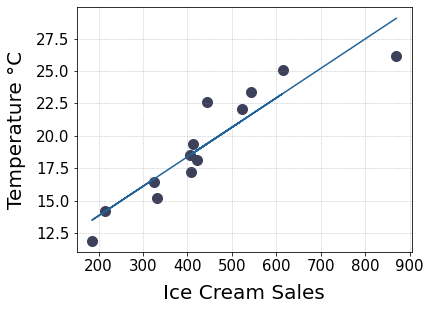

In [ ]:
# The scatter plot with trend line

s1 = Scatter()
"""Basic scatter plot with trend line or not 

This function will convert the user's incoming data set into DataFrame and then draw
the scatter Chart using Matplotlib. This scatter chart can show x, y and trend line.
The basic scatter plot is used to plot the relationship bewteen two variables. The user can
select trend_line=True to use the trend line.

Args:
    file: file name of your data source
    x_col_name: The X column name
    y_col_name: The Y column name
    x_label: x axis label
    y_label: y axis label
    plot_title : The title of the plot
    output_name : the output file name. The deafult output name is dataset name. The output file type is PDF. For example, The output file name would be :'dataset1.pdf'

"""
s1.scatter_plot(
    file='ice_cream.xlsx',
    x_col_name='Ice Cream Sales',
    y_col_name='Temperature',
    x_label='Ice Cream Sales',
    y_label='Temperature °C',
    trend_line=True,
    scatter_size=100,
    output_name='ice_cream.jpg')


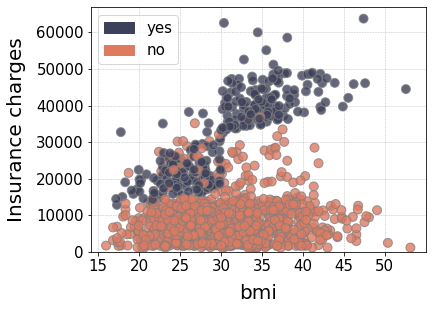

In [ ]:
# The scatter plot with multiple category -- different category will show in differnt color

s2 = Scatter()
"""scatter plot with differnt category

This function will convert the user's incoming data set into DataFrame and then draw
the scatter Chart using Matplotlib. This scatter chart can show x, y and different color for different category scatter.

The user have to input three vaiables column inculding x_col_name, y_col_name and category_col. The category_col
will make each scatter being different color and also have the legend labels.


Agrs:
    file: file name of your data source
    x_col_name: The X column name
    y_col_name: The Y column name
    category_col : The category of each scatter
    x_label: x axis label
    y_label: y axis label
    plot_title : The title of the plot
    output_name : the output file name. The deafult output name is dataset name. The output file type is PDF. For example, The output file name would be :'dataset1.pdf'


"""
s2.scatter_category(
    file='insurance.csv',
    x_col_name='bmi',
    y_col_name='charges',
    x_label='bmi',
    y_label='Insurance charges',
    category_col='smoker',
    output_name='smoker.jpg',
    scatter_size=80,
    legend_size=15)


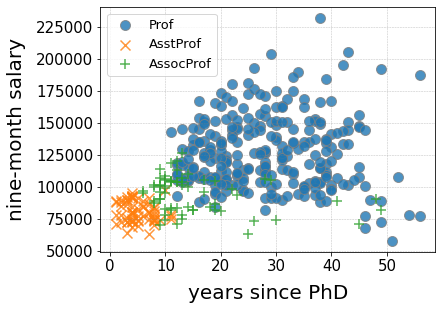

In [ ]:
# The scatter plot with multiple category -- different category will show in differnt marker
s3 = Scatter()
"""scatter plot with differnt marker

This function will convert the user's incoming data set into DataFrame and then draw
the scatter Chart using Matplotlib. This scatter chart can show x, y and different marker for different category scatter.

The user have to input three vaiables column inculding x_col_name, y_col_name and category_col. The category_col
will make each scatter being different marker and also have the legend labels.


Agrs:
    file: file name of your data source
    x_col_name: The X column name
    y_col_name: The Y column name
    category_col : The category of each scatter
    x_label: x axis label
    y_label: y axis label
    plot_title : The title of the plot
    output_name : the output file name. The deafult output name is dataset name. The output file type is PDF. For example, The output file name would be :'dataset1.pdf'


"""
s3.scatter_marker(file='salaries.csv',
                  x_col_name='yrs.since.phd',
                  y_col_name='salary',
                  x_label='years since PhD',
                  y_label='nine-month salary',
                  category_col='rank',
                  output_name='marker.jpg',
                  scatter_size=100,
                  alpha=0.8,
                  legend_size=13)
